In [1]:
cd /content/drive/MyDrive/SOAI/Assignments/s8

/content/drive/MyDrive/SOAI/Assignments/s8


In [2]:



from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from utils import *
# from dataloader import Cifar10DataLoader

In [3]:

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [4]:
cifar_trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
#list of 50,000 images each with dimension 3x32x32
imgs = [item[0] for item in cifar_trainset] # item[0] and item[1] are image and its label
#stacking all 50k images along 4th dimension , shape will be 3 x 32 x 32 x 50,000
imgs = torch.stack(imgs, dim=3)

#calculating mean over each channel, img.view will convert images into 3 x (32x32x50000) ie 3 x 5120000
print(imgs.view(3,-1).mean(dim=1))


print(imgs.view(3, -1).std(dim=1))

Files already downloaded and verified
tensor([0.4914, 0.4822, 0.4465])
tensor([0.2470, 0.2435, 0.2616])


In [5]:


torch.manual_seed(1)
batch_size = 128

kwargs = {'num_workers': 4, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.CIFAR10('../data', train=True, download=True,
                    transform=transforms.Compose([
                                      transforms.RandomHorizontalFlip(p=.5), # FLips the image w.r.t horizontal axis
                                      transforms.RandomCrop(32,padding=4),     #Rotates the image to a specified angel
                                    #   transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)), #Performs actions like zooms, change shear angles.
                                    #   transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2), # Set the color params
                        transforms.ToTensor(),
                        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.CIFAR10('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)


Files already downloaded and verified


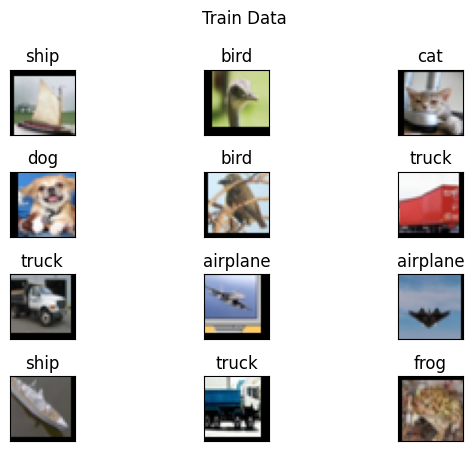

In [6]:
visualize_data(train_loader, 12, "Train Data", classes=cifar_trainset.classes)

In [7]:
from model import Net, model_train, model_test, model_summary, Model_cifar


In [8]:


model = Model_cifar_bn().to(device)
model_summary(model,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           4,608
              ReLU-6           [-1, 32, 32, 32]               0
       BatchNorm2d-7           [-1, 32, 32, 32]              64
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 16, 32, 32]             512
        MaxPool2d-10           [-1, 16, 16, 16]               0
           Conv2d-11           [-1, 16, 16, 16]           2,304
             ReLU-12           [-1, 16, 16, 16]               0
      BatchNorm2d-13           [-1, 16, 16, 16]              32
          Dropout-14           [-1, 16,

In [9]:
from torch.optim.lr_scheduler import StepLR
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)

for epoch in range(1, 21):
    print(f"epoch {epoch}")
    model_train(model, device, train_loader, optimizer, epoch)
    scheduler.step()
    model_test(model, device, test_loader)

epoch 1


Train: Loss=1.6428 Batch_id=390 Accuracy=31.16: 100%|██████████| 391/391 [01:47<00:00,  3.62it/s]



Test set: Average loss: 1.5996, Accuracy: 3962/10000 (39.62%)

epoch 2


Train: Loss=1.4092 Batch_id=390 Accuracy=48.06: 100%|██████████| 391/391 [01:47<00:00,  3.64it/s]



Test set: Average loss: 1.3167, Accuracy: 5193/10000 (51.93%)

epoch 3


Train: Loss=1.1526 Batch_id=390 Accuracy=54.88: 100%|██████████| 391/391 [01:47<00:00,  3.64it/s]



Test set: Average loss: 1.2101, Accuracy: 5677/10000 (56.77%)

epoch 4


Train: Loss=1.0748 Batch_id=390 Accuracy=58.57: 100%|██████████| 391/391 [01:46<00:00,  3.67it/s]



Test set: Average loss: 1.1557, Accuracy: 5844/10000 (58.44%)

epoch 5


Train: Loss=1.0324 Batch_id=390 Accuracy=61.17: 100%|██████████| 391/391 [01:47<00:00,  3.63it/s]



Test set: Average loss: 1.0967, Accuracy: 6049/10000 (60.49%)

epoch 6


Train: Loss=1.0572 Batch_id=390 Accuracy=62.73: 100%|██████████| 391/391 [01:47<00:00,  3.65it/s]



Test set: Average loss: 0.9908, Accuracy: 6463/10000 (64.63%)

epoch 7


Train: Loss=1.0431 Batch_id=390 Accuracy=63.85: 100%|██████████| 391/391 [01:46<00:00,  3.67it/s]



Test set: Average loss: 0.9392, Accuracy: 6605/10000 (66.05%)

epoch 8


Train: Loss=0.8068 Batch_id=390 Accuracy=65.04: 100%|██████████| 391/391 [01:46<00:00,  3.67it/s]



Test set: Average loss: 0.9418, Accuracy: 6655/10000 (66.55%)

epoch 9


Train: Loss=0.9089 Batch_id=390 Accuracy=66.00: 100%|██████████| 391/391 [01:46<00:00,  3.66it/s]



Test set: Average loss: 0.9477, Accuracy: 6677/10000 (66.77%)

epoch 10


Train: Loss=0.7172 Batch_id=390 Accuracy=66.66: 100%|██████████| 391/391 [01:47<00:00,  3.62it/s]



Test set: Average loss: 0.9947, Accuracy: 6514/10000 (65.14%)

epoch 11


Train: Loss=0.6790 Batch_id=390 Accuracy=68.91: 100%|██████████| 391/391 [01:46<00:00,  3.68it/s]



Test set: Average loss: 0.8597, Accuracy: 6901/10000 (69.01%)

epoch 12


Train: Loss=0.7103 Batch_id=390 Accuracy=69.34: 100%|██████████| 391/391 [01:46<00:00,  3.67it/s]



Test set: Average loss: 0.8424, Accuracy: 6952/10000 (69.52%)

epoch 13


Train: Loss=0.8990 Batch_id=390 Accuracy=69.65: 100%|██████████| 391/391 [01:47<00:00,  3.65it/s]



Test set: Average loss: 0.8387, Accuracy: 6951/10000 (69.51%)

epoch 14


Train: Loss=1.0425 Batch_id=390 Accuracy=69.75: 100%|██████████| 391/391 [01:47<00:00,  3.64it/s]



Test set: Average loss: 0.8452, Accuracy: 6979/10000 (69.79%)

epoch 15


Train: Loss=0.8273 Batch_id=390 Accuracy=69.89: 100%|██████████| 391/391 [01:47<00:00,  3.65it/s]



Test set: Average loss: 0.8336, Accuracy: 6996/10000 (69.96%)

epoch 16


Train: Loss=1.0485 Batch_id=390 Accuracy=69.87: 100%|██████████| 391/391 [01:48<00:00,  3.61it/s]



Test set: Average loss: 0.8306, Accuracy: 7013/10000 (70.13%)

epoch 17


Train: Loss=0.7009 Batch_id=390 Accuracy=70.27: 100%|██████████| 391/391 [01:47<00:00,  3.62it/s]



Test set: Average loss: 0.8401, Accuracy: 6969/10000 (69.69%)

epoch 18


Train: Loss=0.9626 Batch_id=390 Accuracy=70.23: 100%|██████████| 391/391 [01:47<00:00,  3.65it/s]



Test set: Average loss: 0.8173, Accuracy: 7021/10000 (70.21%)

epoch 19


Train: Loss=0.8147 Batch_id=390 Accuracy=70.24: 100%|██████████| 391/391 [01:47<00:00,  3.63it/s]



Test set: Average loss: 0.8238, Accuracy: 7041/10000 (70.41%)

epoch 20


Train: Loss=0.7229 Batch_id=390 Accuracy=70.45: 100%|██████████| 391/391 [01:47<00:00,  3.65it/s]



Test set: Average loss: 0.8263, Accuracy: 7002/10000 (70.02%)



In [10]:
misclassified_images, predictions, labels = get_misclassified_images(model,device,test_loader)

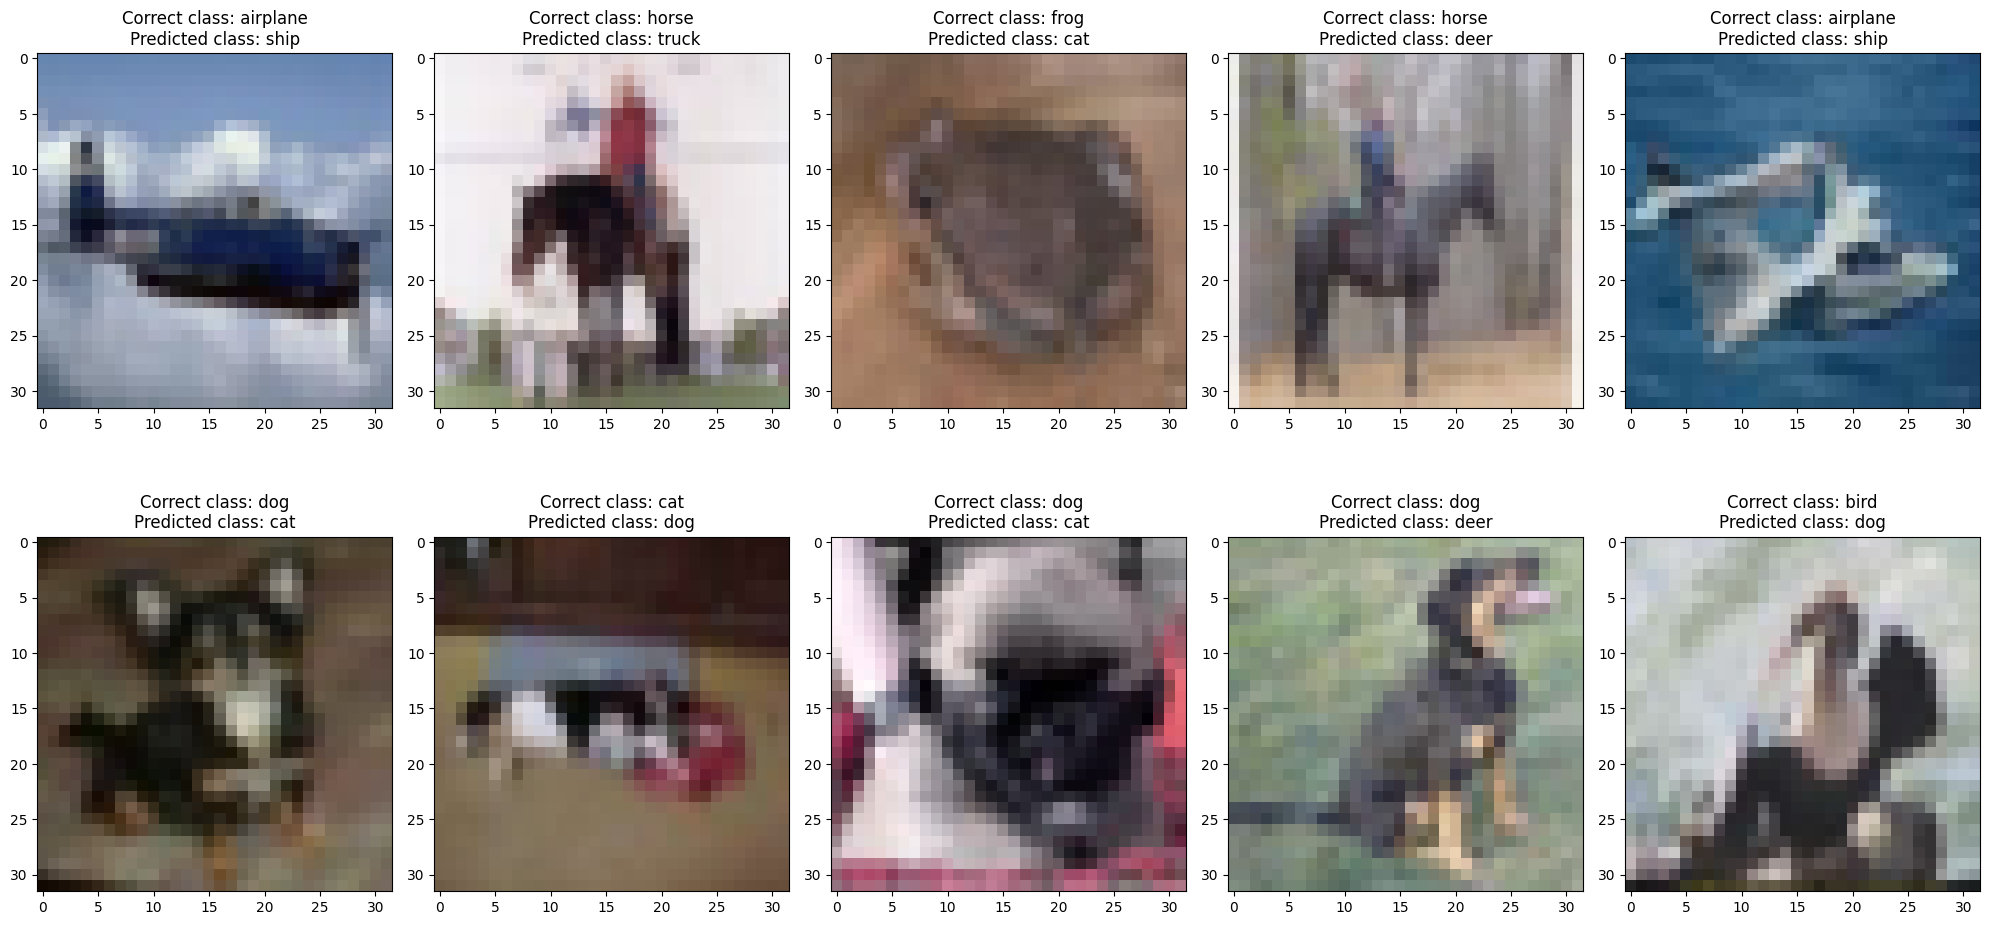

In [11]:
show_misclassified_images(
    misclassified_images[:10],
    predictions[:10],
    labels[:10],
    cifar_trainset.classes,
)